In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

df_bfcdata = pd.read_csv('breast+cancer+wisconsin+original/breast-cancer-wisconsin.data', header = None)
names =['sample_code', 'clump_thickness', 'cell_size', 'cell_shape', 'marginal_adhesion', 'epithelial_cell_size', 'bare_nuclei', 'bland_chromantin', 'normal_nucleoli', 'mitosis', 'diagnosis']
df_bfcdata.columns = names

In [19]:
df_bfcdata.head()

,sample_code,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromantin,normal_nucleoli,mitosis,diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [20]:
# Handle missing values
df_bfcdata.dropna(inplace=True)  # Remove rows with missing values



In [21]:
label_encoder = LabelEncoder()
df_bfcdata['diagnosis'] = label_encoder.fit_transform(df_bfcdata['diagnosis'])

In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

X = df_bfcdata.drop('diagnosis', axis=1)  # Features
X = X.drop('sample_code', axis=1)  # Features
X = encoder.fit_transform(X)
y = df_bfcdata['diagnosis']  # Labels

In [38]:
from sklearn.model_selection import train_test_split

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model 1: Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for hyperparameter tuning using cross-validation
rf_grid = GridSearchCV(estimator=rf_classifier, param_grid=rf_params, scoring='accuracy', cv=5)
rf_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_params = rf_grid.best_params_

# Train the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_rf_params)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)

# Model 2: Support Vector Machine (SVM)


In [42]:
from sklearn.svm import SVC

# Create a Support Vector Machine classifier
svm_classifier = SVC(random_state=42)

# Define hyperparameters for tuning
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform grid search for hyperparameter tuning using cross-validation
svm_grid = GridSearchCV(estimator=svm_classifier, param_grid=svm_params, scoring='accuracy', cv=5)
svm_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_svm_params = svm_grid.best_params_

# Train the Support Vector Machine classifier with the best hyperparameters
best_svm_classifier = SVC(random_state=42, **best_svm_params)
best_svm_classifier.fit(X_train, y_train)

SVC(C=1, random_state=42)

# Hyperparameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for hyperparameter tuning using cross-validation
rf_grid = GridSearchCV(estimator=rf_classifier, param_grid=rf_params, scoring='accuracy', cv=5)
rf_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_params = rf_grid.best_params_

# Hyperparameter Tuning for Support Vector Machine (SVM):

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create a Support Vector Machine classifier
svm_classifier = SVC(random_state=42)

# Define hyperparameters for tuning
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Perform grid search for hyperparameter tuning using cross-validation
svm_grid = GridSearchCV(estimator=svm_classifier, param_grid=svm_params, scoring='accuracy', cv=5)
svm_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_svm_params = svm_grid.best_params_

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train Random Forest model with best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_rf_params)
best_rf_classifier.fit(X_train, y_train)

# Train SVM model with best hyperparameters
best_svm_classifier = SVC(random_state=42, **best_svm_params)
best_svm_classifier.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [46]:
from sklearn.metrics import accuracy_score

# Predictions on test set using Random Forest
rf_predictions = best_rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Predictions on test set using SVM
svm_predictions = best_svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

Random Forest Accuracy: 0.9571428571428572
SVM Accuracy: 0.9642857142857143


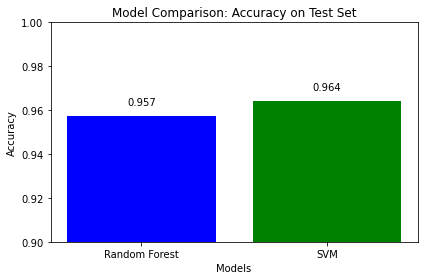

In [47]:
import matplotlib.pyplot as plt

# Accuracy scores of the two models
accuracy_scores = [rf_accuracy, svm_accuracy]
models = ['Random Forest', 'SVM']

# Create a bar plot to compare accuracy scores
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy on Test Set')
plt.ylim(0.9, 1.0)  # Set y-axis limit for better visualization

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.005, f'{score:.3f}', ha='center')

plt.tight_layout()
plt.show()


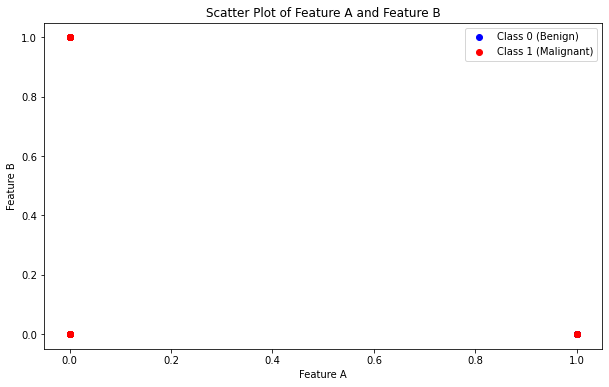

In [49]:
# Assuming 'X' contains your feature matrix and 'y' contains your class labels
# For simplicity, let's assume X has only two features: X[:, 0] (feature A) and X[:, 1] (feature B)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0 (Benign)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1 (Malignant)')
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.title('Scatter Plot of Feature A and Feature B')
plt.legend()
plt.show()

AttributeError: coef_ is only available when using a linear kernel

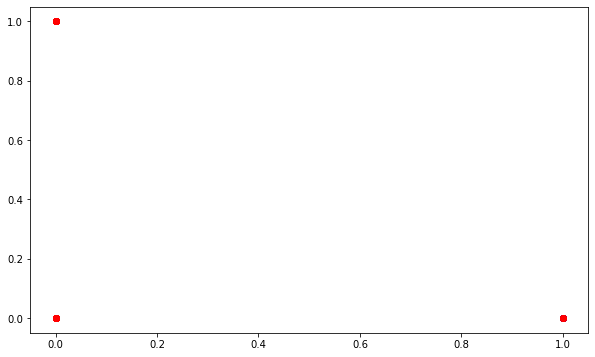

In [51]:
# Plot the data points
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0 (Benign)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1 (Malignant)')

# Plot a linear decision boundary (assuming you have a linear model or SVM with a linear kernel)
x_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_boundary = - (best_svm_classifier.coef_[0][0] * x_boundary + best_svm_classifier.intercept_[0]) / best_svm_classifier.coef_[0][1]
plt.plot(x_boundary, y_boundary, color='black', linestyle='dashed', label='Linear Decision Boundary')

plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.title('Scatter Plot with Linear Decision Boundary')
plt.legend()
plt.show()

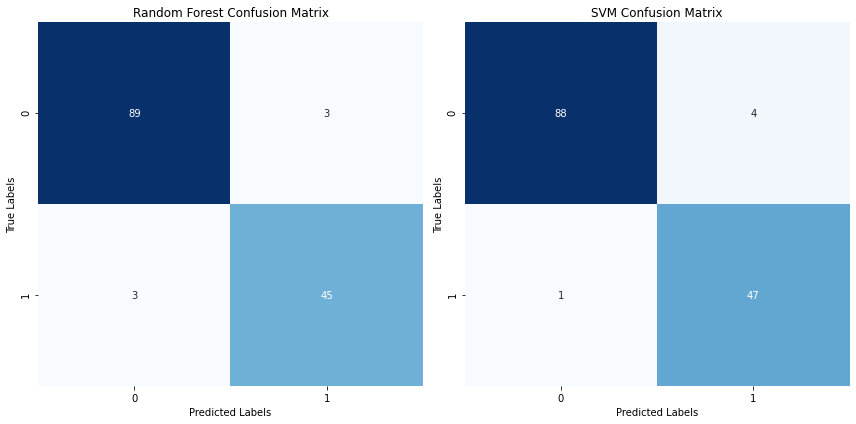

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Create confusion matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot the confusion matrices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.subplot(1, 2, 2)
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()
